In [2]:
import os
os.chdir(r"C:\Users\ashto\DAPPEr-main") #change directory to dapper-main folder
current_directory = os.getcwd()
print(f"Current directory: {current_directory}")

Current directory: C:\Users\ashto\DAPPEr-main


In [3]:
from src import *
from src.UDIP_Lib import *
import src.fitting.fit as R_fitting
import src.UDIP_Lib.UDIP_Lib_V19 as UDIP_Lib  #making updating UDIP_Lib easier
from src.RockSat_json.RockSat_json import import_data
import numpy as np
from scipy import signal
import json
import pandas as pd
import matplotlib.pyplot as plt
from scipy import optimize
from scipy.optimize import curve_fit
from scipy.interpolate import interp1d


In [4]:
packets = pd.read_json("data/packets/UDIP_4_800s.json")
print(packets['packets']['Sensor']['10'].keys())

dict_keys(['Start', 'Stop', 'Count', 'Acceleration', 'Spin Rate', 'Magnetic Field', 'Temperature', 'Photo Diode'])


In [ ]:
spinx = np.array([])
spiny = np.array([])
spinz = np.array([])
accx = np.array([])
accy = np.array([])
accz = np.array([])
photodiode = np.array([])
Bfieldx = np.array([])
Bfieldy = np.array([])
Bfieldz = np.array([])
timeStart = np.array([])
for key in range(0, len(packets['packets']['Sensor'].keys()),1):
    spinx = np.append(spinx, packets['packets']['Sensor'][f'{key}']['Spin Rate'][0])
    spiny = np.append(spiny,packets['packets']['Sensor'][f'{key}']['Spin Rate'][1])
    spinz = np.append(spinz, packets['packets']['Sensor'][f'{key}']['Spin Rate'][2])
    accx = np.append(accx, packets['packets']['Sensor'][f'{key}']['Acceleration'][0])
    accy = np.append(accy,packets['packets']['Sensor'][f'{key}']['Acceleration'][1])
    accz = np.append(accz, packets['packets']['Sensor'][f'{key}']['Acceleration'][2])
    photodiode = np.append(photodiode, packets['packets']['Sensor'][f'{key}']["Photo Diode"])  
    Bfieldx = np.append(Bfieldx, packets['packets']['Sensor'][f'{key}']['Magnetic Field'][0])
    Bfieldy = np.append(Bfieldy, packets['packets']['Sensor'][f'{key}']['Magnetic Field'][1])
    Bfieldz = np.append(Bfieldz, packets['packets']['Sensor'][f'{key}']['Magnetic Field'][2])
    timeStart = np.append(timeStart, packets['packets']['Sensor'][f'{key}']['Start']) 
shifted_time = (timeStart / 1000) - 57 #account for launching 57 sec after starting packet, also turn from ms to seconds
spinxHz = spinx / (2 * np.pi)
spinyHz = spiny / (2 * np.pi)
spinzHz = spinz / (2 * np.pi)

(5.3, 5.5)

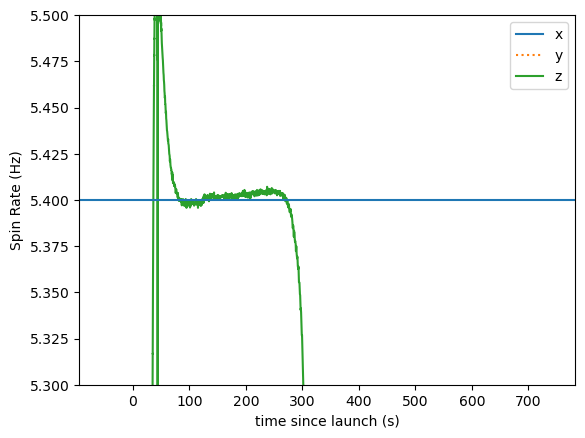

In [21]:
plt.plot((shifted_time), spinxHz, label='x')
plt.plot((shifted_time), spinyHz, label='y',ls='dotted')
plt.plot((shifted_time), spinzHz, label='z')
plt.xlabel("time since launch (s)")
plt.ylabel("Spin Rate (Hz)")
plt.legend()
plt.axhline(5.4)
#plt.axvline(45)
#plt.axvline(300)
plt.ylim(5.3,5.5)
#plt.xlim(120,220)

In [26]:
time_mask = (shifted_time >= 100) & (shifted_time <= 290)
spinzHz_filtered = spinzHz[time_mask]
average_spinzHz = np.mean(spinzHz_filtered)
#5.4021734969477615
print("Average spinzHz from 100s to 290s:", average_spinzHz)


Average spinzHz from 100s to 290s: 5.401007570656262


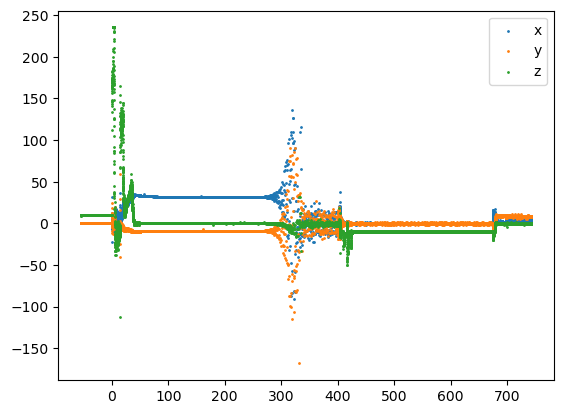

In [7]:
plt.scatter(shifted_time, accx, label="x", s=1)
plt.scatter(shifted_time, accy, label='y', s=1)
plt.scatter(shifted_time, accz, label='z', s=1)
plt.legend()